<a href="https://colab.research.google.com/github/ELMehdiNaor/TensorFlow-Developer-Certificate-in-2022-Zero-to-Mastery/blob/main/01_neural_networks_regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow: 

There are many definitions for a regression problem but in our case, we are going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter.... predicting a number

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.0


## Creating data to view and fit

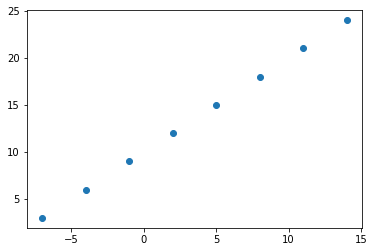

In [2]:
# Let's import the necessary packages
import numpy as np
import matplotlib.pyplot as plt 

# Creates features:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0 ,11.0, 14.0])
# Create labels: 
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
# Visualize the data: 
plt.scatter(X,y)

In [3]:
# Let's figure out the pattern: 
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [4]:
y == X + 10 # This is the relationship that we will get our Neural Network to learn

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [5]:
# Create a demo tensor for our hausing price prediction problem
house_info  = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
input_shape = X[0].shape  # This is a scalar 
output_shape = y[0].shape # This is a scalar
input_shape, output_shape 

((), ())

In [9]:
X[0].ndim

0

In [10]:
# Let's Turn our Numpy Arrays into tenors with dtype float32
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
input_shape = X[0].shape 
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

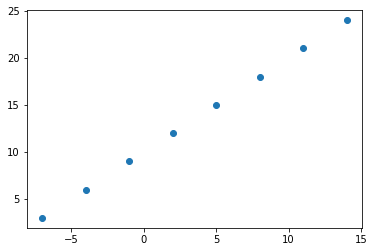

In [12]:
# Visualize 
plt.scatter(X,y)

## Steps in modelling with TensorFlow
1-**Creating a model**: define the input and output layers, as well as the hidden layers of a deep learning model 

2-**Compiling a model**: define the **loss function**(in other words, the function will tell our model how wrong it is) and the **optimizer**(tells our model how to improce the patterns it's learning) and **evaluation metrics**(what we can use to interpret the peformance of our model)

3-**Fitting a model**: letting the model try to find patterns between x and y (features and labels)

In [13]:
# Set random Seed for reproducibility:
tf.random.set_seed(42)

In [14]:
# Step 1: Create a model using the Sequential API
model = tf.keras.Sequential([ 
         tf.keras.layers.Dense(1) # Take one number as an input and produce one number as an output                    
])

# Step 2: Compile the model
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# Step 3: Fit the model 
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 538ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 10.9748 - mae: 10.9748


In [15]:
#  Let's try to make a predictin uaing our model: 
model.predict([17.0])

array([[12.716021]], dtype=float32)

## Improving our model 
We can improve our model, by altering the steps we took to create a model:

1-**Creating a model**: here we might add more layers, increase the number of hidden units withing each of the hidden layers, change the activation function of each layer. 

2-**Compiling a model**: here we might change the optimization function or perhaps the learning rate of the optimization function. 

3-**Fitting a model**: here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from)

In [16]:
# Let's rebuild our model: 

# Step 1: Create the model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1)                       
])

# Step 2: Compile the model 
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(), 
              metrics=["mae"])

# Step 3: Fit the model 
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 366ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 

In [17]:
# Let's remind ourselves from the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [18]:
# Let's see if the prediction of our model has improved:
model.predict([17.0]) # the predicted value should be = 27.0

array([[29.739855]], dtype=float32)

In [19]:
# The results was no bad actually. Let's see if we can make another change to improve our model

In [20]:
# Step1: Create the model (This time with an extra hidden layer with 100 hidden units):

In [21]:
model = tf.keras.Sequential([
         tf.keras.layers.Dense(100, activation="relu"), 
         tf.keras.layers.Dense(1)                       
])


In [22]:
# Step 2: Compile the model:
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(), 
              metrics =["mae"])

In [23]:
# Step 3: Fit the model: 
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 405ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 8ms/step

In [24]:
# Let's see if the prediction capability of our model improved
model.predict([17.0]) # The predicted Value should be 27.0

array([[31.223137]], dtype=float32)

In [25]:
# Let's rebuild our model for a second time
# 1. Create the model (This time we will reduce the number of units in the hidden layers and not use an activation function)
model = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation=None),
        tf.keras.layers.Dense(1)
])

#2. Compile the model: (This time we will change the optimizer to adam and adjust its learning rate)
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.01), 
              metrics=["mae"])

#3. Fit the model: 
model.fit(tf.expand_dims(X, axis=-1),y, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 433ms/step - loss: 12.2895 - mae: 12.2895
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.5828 - mae: 11.5828
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8658 - mae: 10.8658
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1378 - mae: 10.1378
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 9.3973 - mae: 9.3973
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 8.6426 - mae: 8.6426
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 7.8717 - mae: 7.8717
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 7.0828 - mae: 7.0828
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 6.8696 - mae: 6.8696
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.2795 - mae: 7.2795
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 7.5933 

In [26]:
# Let*s see if our enhanced model will to do a better job at predicting the output: 
model.predict([17.0]) # The predicted value should be: 27.0

array([[27.890127]], dtype=float32)

In [27]:
# It actually did ! 

**INFO**: The real way we evaluate our Machine Learning/ Deep Learning model, it's not the metrics it gives us from the training data, it's the metrics we get from the data it has never seen before

## Evaluating a model
In practive, a typical worfklow you'll go through when building neural networks is: 

Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate .....

When it comes to evaluation .... there are three words you should memorize:
"Visualize, Visualize, Visualize"

It's a good idea to visualize: 
- The data - what data are we working with? what does it look like?

- The model itself - what does our model look like?

- The training of a model - how does a model perform while it learns?

- The prediction of the model - how do the predictions of a model line up against the ground truth (the original labels)


In [28]:
# Import the necessary packages: 
import tensorflow as tf
print(tf.__version__)

2.8.0


In [29]:
# Let's make a bigger dataset: 
X = tf.range(-100,100,4)
X
X.shape, X.ndim, X.dtype

(TensorShape([50]), 1, tf.int32)

In [30]:
# Make Labels of the dataset: 
y = X + 10 
y  
y.shape, y.ndim, y.dtype

(TensorShape([50]), 1, tf.int32)

(<matplotlib.collections.PathCollection at 0x7fa058209fd0>,
 Text(0.5, 0, 'Features'),
 Text(0, 0.5, 'Labels'),
 <matplotlib.legend.Legend at 0x7fa054fefe10>)

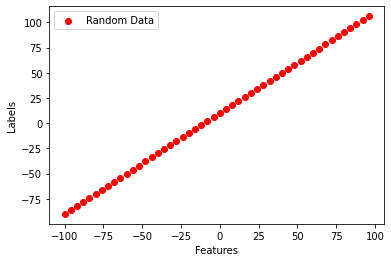

In [31]:
# Let's visualize  the data:
from matplotlib import pyplot as plt 
plt.scatter(X,y, c="r", label="Random Data"), plt.xlabel("Features"), plt.ylabel("Labels"), plt.legend()

### The Three Sets 

-**Training Set:** the model learns from this data, which is typically 70-80% of the total data you have available

-**Validation Set:** the model gets tuned on this data , which is typically 10-15% of the data available

-**Test Set:** the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available

In [32]:
# Check the length of how many samples we have:
len(X)

50

In [33]:
# Split the data into train and test sets: 
X_train = X[:40] # first 40 are training samples (80 %of the data)
y_train = y[:40] # 
X_test =  X[40:] # Last 10 are testing samples (20% of the data)
y_test = y[40:]  #
# Check the length:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualiazing the data 
Now we've got our data in training and test sets... let's visualize it again

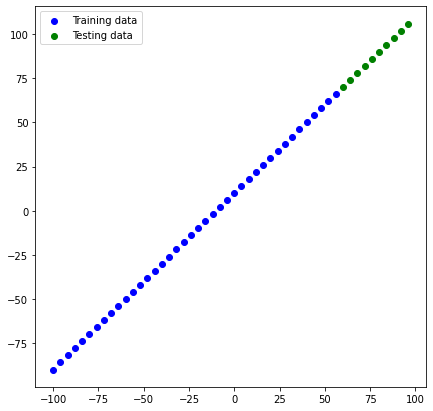

In [34]:
# Creat a plot figure: 
plt.figure(figsize=(7,7))
# Plot the training data in blue: 
plt.scatter(X_train,y_train, c ="b", label= "Training data")
# Plot the test data in green: 
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend: 
plt.legend()

In [35]:
# Let's have a look at how at how to buid a neural network for our data: 
# 1.Create the model: 
model = tf.keras.Sequential([
         tf.keras.layers.Dense(1) # We are using one X_Value to predict one Y_Value, hence why our layer has 1 hidden unit
])

# 2.Compile the model:
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3.Fit the model: 
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 52.9926 - mae: 52.9926
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 14.7435 - mae: 14.7435
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 10.7796 - mae: 10.7796
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2098 - mae: 10.2098
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 12.3155 - mae: 12.3155
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 12.8958 - mae: 12.8958
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 10.8050 - mae: 10.8050
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 13.9109 - mae: 13.9109
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 14.8011 - mae: 14.8011
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 9.9978 - mae: 9.9978
Epoch 11/100
2/2 [==============================] - 0s 8ms/s

In [36]:
# Summary of the model: 
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Let's create a model which builds automatically by defining the input shape argument: 
# Set the seed for reproducibility: 
tf.random.set_seed(42)
# 1.Create a model (same as above):
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, input_shape = [1], name="input_layer"),                     
        tf.keras.layers.Dense(1, name="output_layer")
]) 

# 2.Compile the model:
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(),
              metrics =["mae"])

# Visualize the model: 
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


-**Toral params:** total number of parameters in the model 

-**Trainable parameters:** there are the parameters (patters) the model can update as it trains

-**Non-trainable params:** these parameter aren't updated during training(this is typical when you bring in already learn patterns or parameter from other models during transfer learning) 

 📖**Ressource:** for a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video: https://www.youtube.com/watch?v=njKP3FqW3Sk

In [38]:
# Let's fit our model to the training data: 
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100, verbose=0)


In [39]:
# Get a summary of our model: 
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


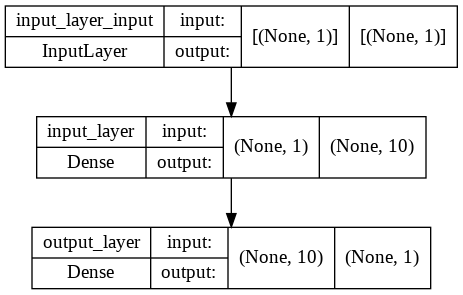

In [40]:
# Plot the model:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualize our Model's prediction

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions)

In [41]:
# Make some predictions: 
y_pred = model.predict(X_test)
y_pred.shape, y_pred.ndim, y_pred.dtype, len(y_pred)

((10, 1), 2, dtype('float32'), 10)

In [42]:
# Let's create a plotting function to visualize our data (Training, Testing, Prediction)
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions = y_pred):  
   """
   Plots training data, test data and compares predictions to ground truth label 
   """
   # Create a figure:
   plt.figure(figsize=(10,7))
   # Plot the training data in blue: 
   plt.scatter(train_data, train_labels, c="b", label="Training data")
   # Plot the testing data in green: 
   plt.scatter(test_data, test_labels, c="g", label="Testing data")
   # Plot the model predictions in red: 
   plt.scatter(test_data, predictions, c="r", label="Predictions")
   # Show the legend: 
   plt.legend()

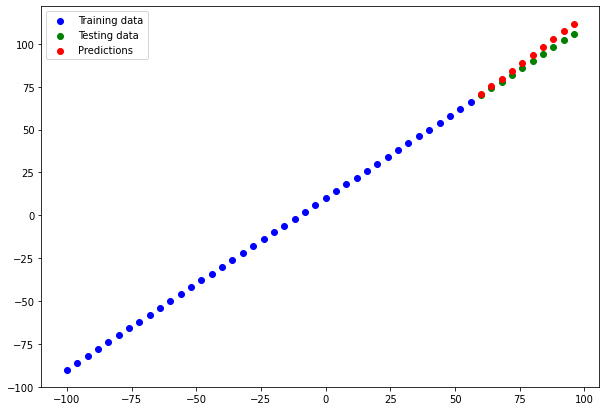

In [43]:
plot_predictions()

### Evaluating our model's prediction with regression evaluatin metrics: 

Depending on the problem you are working on, there will be different evaluation metrics to evaluate your model's performance.
Since we are working on aa regression, two of the main metrics: 
-**MAE** - mean absolute error, "on average, how wrong is each of my model's predictions"

-**MSE** - mean square error, "square the average error"

In [44]:
# Evaluate the model on the test data: 
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 150ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [45]:
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [46]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [47]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [48]:
# Calculate the mean absolute error: 
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [49]:
# Calculate the mean square error: 
mse = tf.metrics.mean_squared_error(y_true = y_test, y_pred=tf.squeeze(y_pred))
mse 

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [50]:
# Let's create another two functions so we can use them later: 
# First one: 
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

# Second one: 
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true, y_pred=tf.squeeze(y_pred))

# Quick test: 
mae_val = mae(y_test,y_pred)
mse_val = mse(y_test, y_pred)
print("The mean absolute error is:", mae_val)
print("The mean squarred error is:", mse_val)

The mean absolute error is: tf.Tensor(3.1969407, shape=(), dtype=float32)
The mean squarred error is: tf.Tensor(13.070143, shape=(), dtype=float32)


### Running experiments to improve our model: 
**Remember:** Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it --> .... 

1-**Get more data** - get more examples for your model to train on (more opportunities to learn patters or relationships between features and labels)

2-**Make your model larger** - this might come in the form of more layers or more hidden units in each layer

3-**Train for longer** - give your model a chance to find patterns in the data

Let's do 3 modelling experiments:

1-`model_1` - same as the original model, 1 layer, trained for 100 epochs 

2-`model_2` - 2 layers, trained for 100 epochs

3-`model_3` - 2 layers,  trained for 500 epochs

**Build `model_1`**

In [51]:
# Let's start building model_1:
# Set the random seed for reproducibility: 
tf.random.set_seed(42)

# Step 1 - Create the model: 
model_1 = tf.keras.Sequential([
          tf.keras.layers.Dense(1, name = "output_layer")                     
])

# Step2 - Compile the model:
model_1.compile(loss = tf.keras.losses.mae, 
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# Step3 - Fit the model: 
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100, verbose = 0)

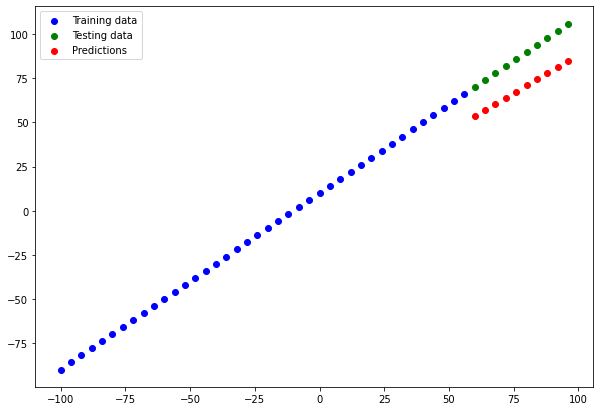

In [52]:
# Step4 - Make and plot predictions for model_1: 
y_pred1_val = model_1.predict(X_test)
plot_predictions(predictions=y_pred1_val)

In [53]:
# Step5 Calculate model_1 evaluation metrics: 
mae_1 = mae(y_test, y_pred1_val)
mse_1 = mse(y_test, y_pred1_val)
print("The mean absolute error of model 1 is:", mae_1)
print("The mean squared error of model 1 is:", mse_1)

The mean absolute error of model 1 is: tf.Tensor(18.745327, shape=(), dtype=float32)
The mean squared error of model 1 is: tf.Tensor(353.57336, shape=(), dtype=float32)


In [54]:
# Get the summary of model_1: 

model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


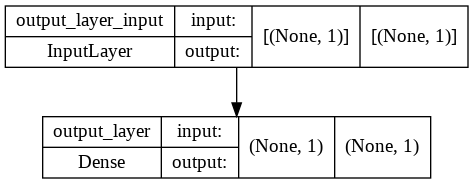

In [55]:
# Plot model_1:
from tensorflow.keras.utils import plot_model
plot_model(model=model_1, show_shapes=True)

**Build `model_2`**
- 2 dense layers, trained for 100 epochs

In [56]:
# Set the random seed for reproducibility: 
tf.random.set_seed(42)

In [57]:
# Step 1- Create the model: 
model_2 = tf.keras.Sequential([
          tf.keras.layers.Dense(10, name = "input_layer"),
          tf.keras.layers.Dense(1, name = "output_layer")                     
])

# Step 2- Compile the model: 

model_2.compile(loss = tf.keras.losses.mae, 
                optimizer = tf.keras.optimizers.SGD(), 
                metrics = ["mae"])

# Step 3- Fit the model: 
model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs = 100, verbose = 0)

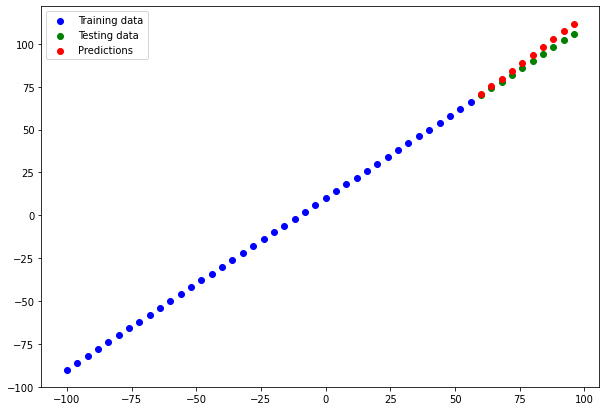

In [58]:
# Step4- Make and plot predictions model_2: 
y_pred2_val = model_2.predict(X_test)
plot_predictions(predictions=y_pred2_val)

In [59]:
# Step5- Calculate model_2 evaluatrion metrcis: 
mae_2 = mae(y_test, y_pred2_val)
mse_2 = mse(y_test, y_pred2_val)
print("The mean absolute error of model 2 is:", mae_2)
print("The mean squarred error of model 2 is:", mse_2)

The mean absolute error of model 2 is: tf.Tensor(3.1969407, shape=(), dtype=float32)
The mean squarred error of model 2 is: tf.Tensor(13.070143, shape=(), dtype=float32)


In [60]:
# Get the model_2 summary:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


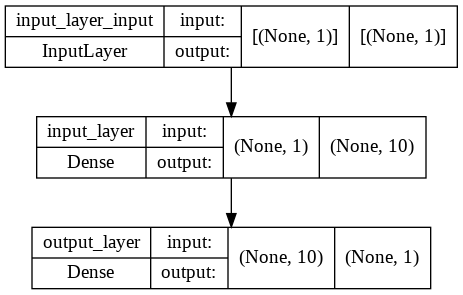

In [61]:
# Plot model_2:
from tensorflow.keras.utils import plot_model
plot_model(model=model_2, show_shapes=True)

**Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary

**Build `model_3`**

In [62]:
# Set the random seed for reproducibility: 
tf.random.set_seed(42)

In [63]:
# Step 1 - Create the model: 
model_3 = tf.keras.Sequential([
          tf.keras.layers.Dense(10, name="hidden_layer"),
          tf.keras.layers.Dense(1,  name="output_layer")                    
])

# Step 2 - Compile the model: 
model_3.compile(loss = tf.keras.losses.mae, 
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# Step 3 - Fit the model: 
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 500, verbose = 0)

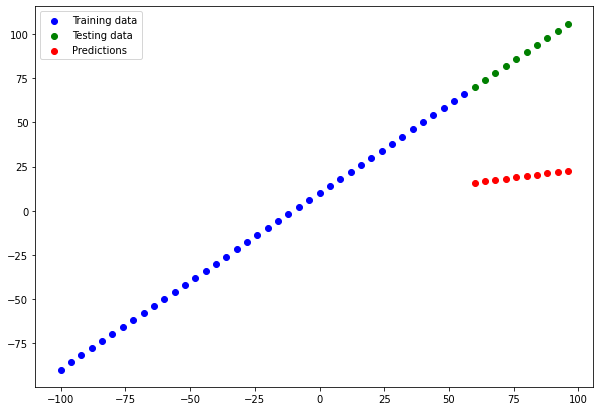

In [64]:
# Step 4 - Make and plot predictions of model_3:
y_pred3_val = model_3.predict(X_test)
plot_predictions(predictions=y_pred3_val)

In [65]:
# Step 5 - Calculate model_2 evaluation metrics:
mae_3 = mae(y_test, y_pred3_val)
mse_3 = mse(y_test, y_pred3_val)
print("The mean asbolute error of model 3 is:", mae_3)
print("The mean squarred error of model 3 is:", mse_3)

The mean asbolute error of model 3 is: tf.Tensor(68.713615, shape=(), dtype=float32)
The mean squarred error of model 3 is: tf.Tensor(4808.0273, shape=(), dtype=float32)


In [66]:
# Get the model summary:
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


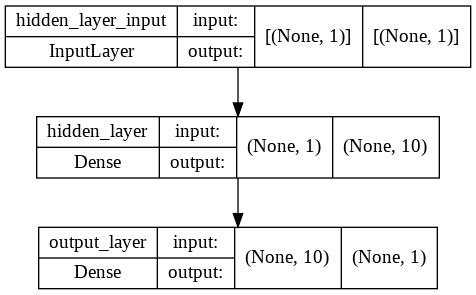

In [67]:
# Plot the model: 
from tensorflow.keras.utils import plot_model
plot_model(model=model_3, show_shapes=True)

### Comparing the results of our experiments: 

We've run few experiments, let's compare the results

In [68]:
# Let's Compare our model's results using a pandas Dataframe:
# Import the pandas package: 
import pandas as pd
# 
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()], 
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]


all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


📓**Note:** one of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things your will figure out which don't work and in turn, get closer to figuring out what does work. Always remember the machine learning practitioners motto: **experiment, experiment, experiment**

### Tracking your experiments: 
One really good habit in machine learning modelling is to track the results of your experiments. Luckily, there are tools to help us !

**Ressource:** as you build more models, you will wait to look into using: 

-**TensorBoard** - a component of the TensorFlow library to help tracl modelling experiments (we will see this one later)

-**Weights and Biases** - a tool for tracking all kinds of machine learning experiments (plugs straight into **TensorBoard**)

## Saving our models 
Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in web application or a mobile app. 

These are the two main formats we can save our models to:

- Save the model using the **SaveModel format** 

- Save the model using the **HDF5 format**

In [69]:
# Save the model using the SaveModel format: 
model_1.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [70]:
# Save the model using the HDF5 format: 
model_1.save("best_model_HDF5_format")

INFO:tensorflow:Assets written to: best_model_HDF5_format/assets


##Loading a saved model

In [71]:
# Load the SavedModel format model: 
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [72]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Compare model_1 predictions with SavedModel format model predictions:
model_1_preds = model_1.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

# Check the models for equality:
model_1_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [74]:
# Let's compate the evaluation metrics of both models: 
mae(y_true=y_test, y_pred=model_1_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [75]:
loaded_SavedModel_format_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

### A larger example

In [76]:
# Let's import the required libraries
import tensorflow as tf
import pandas as pd 
from matplotlib import pyplot as plt

In [77]:
# Read the insurance DATASET: 
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [78]:
# Let's try to one -hot encore our DataFrane so it's all numbers: 
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


## Let's Create X and y (features and labels)
## Create Training and Test sets 
## Build a Neural Network

### **Build `insurance_model1`**

In [79]:
# Create X and y values (features and labels)
# Features:
X = insurance_one_hot.drop("charges", axis = 1)
# Labels (charges):
y = insurance_one_hot["charges"]
# View Features (X):
X.head()
# View Labels (y): 
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [80]:
# Create training and test sets: 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X),  len(X_train), len(X_test)

(1338, 1070, 268)

In [81]:
# Let's build a neural network model
# Set the seed for reproducibility: 
tf.random.set_seed(42)

# 1- Create the model:
insurance_model = tf.keras.Sequential([
           tf.keras.layers.Dense(10, name="hidden_layer"),
           tf.keras.layers.Dense(1, name="output_layer") 
])

# 2- Compile the model: 
insurance_model.compile(loss = tf.keras.losses.mae,
                      optimizer = tf.keras.optimizers.SGD(),
                      metrics = ["mae"])

# 3- Fit the model: 
insurance_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100, verbose=0)

# 4-Check the results of the insurance model on the test data: 
insurance_model.evaluate(X_test, y_test)
y_train.median(), y_train.mean()

9/9 [==============================] - 0s 2ms/step - loss: 8962.0615 - mae: 8962.0615


(9575.4421, 13346.089736364489)

# To improve our model, we will run 2 experiments: 

1- Add an extra layer with more hidden units and use the Adam optimizer

2- Train for longer

3- Insert your experiment here

### **Build `insurance_model2`**

In [82]:
# 1- Creat the model:
insurance_model2 = tf.keras.Sequential([
                   tf.keras.layers.Dense(100, name = "first_hidden_layer"),
                   tf.keras.layers.Dense(10, name="second_hidden_layer"),
                   tf.keras.layers.Dense(1, name="output_layer")                      
])

# 2- Compile the model: 
insurance_model2.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.SGD(), 
                         metrics=["mae"])

# 3- Fit the model: 
insurance_model2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

# 4-Evaluate the model: 
insurance_model2.evaluate(X_test, y_test)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 12571.9131 - mae: 12571.9131
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 11735.0312 - mae: 11735.0312
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 11600.9092 - mae: 11600.9092
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 10928.4941 - mae: 10928.4941
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10313.7666 - mae: 10313.7666
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 10272.3535 - mae: 10272.3535
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 10015.7207 - mae: 10015.7207
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 10061.2988 - mae: 10061.2988
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 9982.2139 - mae: 9982.2139
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 9733.8203 

[9500.6728515625, 9500.6728515625]

In [83]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8962.0615 - mae: 8962.0615


[8962.0615234375, 8962.0615234375]

### **Build `insurance_model3`**

Text(0.5, 0, 'epochs')

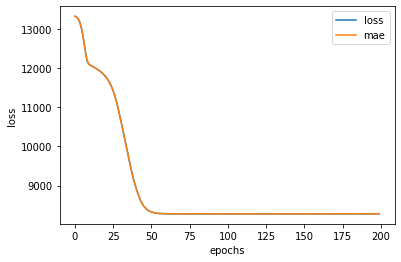

In [84]:
# Set random seed for reproducibilty: 
tf.random.set_seed(42)

# 1- Build the model: 
insurance_model3 = tf.keras.Sequential([
                   tf.keras.layers.Dense(100, name="first_hidden_layer"),
                   tf.keras.layers.Dense(10, name="second_hidden_layer"), 
                   tf.keras.layers.Dense(1, name="output_layer")
])

#2- Compile the model: 
insurance_model3.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ["mae"])

#3- Fit the model: 
history = insurance_model3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200, verbose=0)

# Plo history (also known as a loss curve or a training curve):
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


**Question:** How long should you train for?

It depends. Really ... it depends on the problem you are working on. However, many people have asked this question before ... so TensorFlow has a solution! It's called the `Early Stopping Callback`. **Link:** https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping , which is a TensorFlow component you cann add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standarzation): 

In terms of scaling values, neural networks tend to prefer normalization. If you are not sure which one to use, you could try both and see which performs better.

In [85]:
# Import the necessary libraries:
import tensorflow as tf
from matplotlib import pyplot as plt
import tensorflow as tf

# Read the insurance dataframe:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [97]:
# To prepare our data, we can borrow a few classes from scikit-Learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer: 
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), # turn all these values in these columns between 0 and 1 
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)
# Create X and y (features and labels): 
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets: 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data: 
ct.fit(X_train)
# Transform the training and test data with normalization (MixMaxScaler) and OneHotEncoder:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

# How our data was looking before:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [98]:
# How our data is looking like now: 
X_train_normal[0]


array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

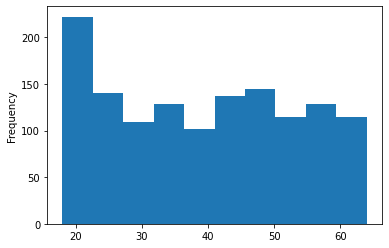

In [99]:
# Visualize the data:
X["age"].plot(kind="hist")

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes

Text(0, 0.5, 'losses')

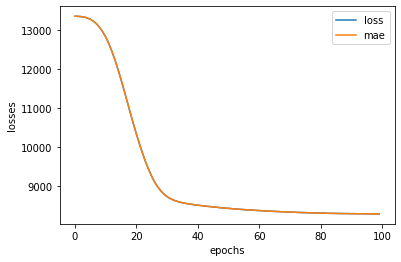

In [104]:
# Build a neural network model to fit on our normalized data:
tf.random.set_seed(42)

# Step.1 create the model: 
insurance_model4 = tf.keras.Sequential([
               tf.keras.layers.Dense(100, name="hidden_layer1"),
               tf.keras.layers.Dense(10, name="hidden_layer2"),
               tf.keras.layers.Dense(1, name="output_layer")
]) 

# Step.2 Compile the model:
insurance_model4.compile(loss=tf.keras.losses.mae,
                         optimizer =tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# Step.3 Fit the model: 
history = insurance_model4.fit(tf.expand_dims(X_train_normal, axis=-1), y_train, epochs=100, verbose = 0)

# Plot history (loss curve / training curve): 
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("losses")

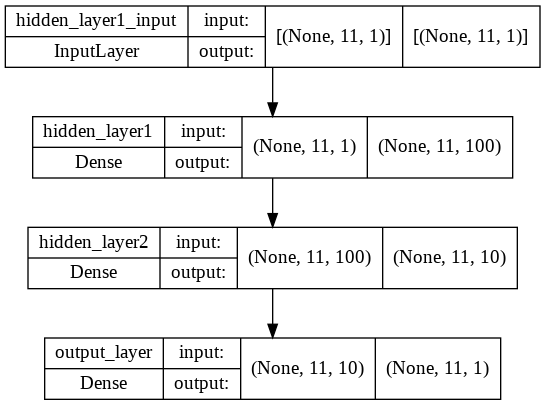

In [105]:
# Plot the model: 
from tensorflow.keras.utils import plot_model
plot_model(model=insurance_model4, show_shapes=True)

In [106]:
# Evaluate our insurance model trained on normalized data: 
insurance_model4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8622.1035 - mae: 8622.1035


[8622.103515625, 8622.103515625]

In [ ]:
# 9/9 [==============================] - 0s 3ms/step - loss: 8962.0615 - mae: 8962.0615
 [8962.0615234375, 8962.0615234375]

In [108]:
# Model predictions: 
y_pred_ins = insurance_model4.predict(X_test_normal)

In [109]:
# Plotting function to visualize the data:
def plot_predictions2(train_data = X_train_normal, train_labels=y_train,
                      test_data = X_test_normal, test_labels=y_test,
                      predictions =y_pred_ins):
  """
  Plots training data, test data and compares predictions to ground truth label
  """
  # Create a figure: 
  plt.figure(figsize=(8,8))
  # Plot training data in blue:
  plt.scatter(X_train_normal, y_train, c="b", label="Training data")
  # Plot test data in green: 
  plt.scatter(X_test_normal, y_test, c="g", label="Test Data")
  # Plot the model predictions: 
  plt.scatter(X_test_normal, predictions, c="r", label="Predictions")
  # 
  plt.legend()

In [120]:
# Visualize the final results as plots:
X_test_normal.dtype, X_test_normal.ndim, X_test_normal.shape

(dtype('float64'), 2, (268, 11))

In [119]:
y_pred_ins.dtype, y_pred_ins.ndim, y_pred_ins.shape

(dtype('float32'), 3, (268, 11, 1))